In [2]:
import pandas as pd

In [17]:
df=pd.read_csv("Downloads/A2DATA/ag2Data_1.csv")
df

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME
0,A2,1,1,True,34.291923
1,A2,2,1,True,26.734768
2,A2,3,1,True,11.983321
3,A2,4,1,True,16.944841
4,A2,5,1,True,14.993226
5,A2,6,1,True,10.801417
6,A2,7,1,True,11.135710
7,A2,8,1,True,13.433250
8,A2,9,1,True,15.359002
9,A2,10,1,True,14.961233


In [18]:
for i in range (2,100):
    colnames=['AGENT', 'ITERATION', 'NO OF GHOSTS', 'RESULT', 'TIME'] 
    p2 = pd.read_csv("Downloads/A2DATA/a2Data_"+str(i)+".csv", names=colnames, header=None)
    df = pd.concat([df, p2], axis=0)
df

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME
0,A2,1,1,True,34.291923
1,A2,2,1,True,26.734768
2,A2,3,1,True,11.983321
3,A2,4,1,True,16.944841
4,A2,5,1,True,14.993226
...,...,...,...,...,...
19,A2,20,99,False,0.099153
20,A2,21,99,False,2.245483
21,A2,22,99,False,0.285808
22,A2,23,99,False,3.990040


In [19]:
Agent = df['AGENT'].iat[0]
Agent

'A2'

In [20]:
DF=df["NO OF GHOSTS"].value_counts().to_frame().sort_index()
DF = DF.rename({'NO OF GHOSTS':'COUNT'}, axis=1)
DF.reset_index(inplace=True)
DF = DF.rename(columns = {'index':'NO OF GHOSTS'})
DF

,NO OF GHOSTS,COUNT
0,1,24
1,2,24
2,3,24
3,4,24
4,5,24
...,...,...
94,95,24
95,96,24
96,97,24
97,98,24


In [21]:
DF.columns

Index(['NO OF GHOSTS', 'COUNT'], dtype='object')

In [22]:
DF1 = pd.merge(df,DF,on ='NO OF GHOSTS',how ='left')
DF1

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME,COUNT
0,A2,1,1,True,34.291923,24
1,A2,2,1,True,26.734768,24
2,A2,3,1,True,11.983321,24
3,A2,4,1,True,16.944841,24
4,A2,5,1,True,14.993226,24
...,...,...,...,...,...,...
2371,A2,20,99,False,0.099153,24
2372,A2,21,99,False,2.245483,24
2373,A2,22,99,False,0.285808,24
2374,A2,23,99,False,3.990040,24


In [23]:
NOFT= df.groupby(["NO OF GHOSTS", "RESULT"]).size().to_frame()
NOFT

0
NO OF GHOSTS RESULT    
1            False    1
             True    23
2            False    5
             True    19
3            False    3
...                  ..
97           True     2
98           False   23
             True     1
99           False   23
             True     1

[178 rows x 1 columns]

In [24]:
NOFT.reset_index(inplace=True)
NOFT = NOFT.rename({0:'SUCCESSCOUNT'}, axis=1)
NOFT

,NO OF GHOSTS,RESULT,SUCCESSCOUNT
0,1,False,1
1,1,True,23
2,2,False,5
3,2,True,19
4,3,False,3
...,...,...,...
173,97,True,2
174,98,False,23
175,98,True,1
176,99,False,23


In [25]:
FinalDf=pd.merge(NOFT, 
                      DF, 
                      on =['NO OF GHOSTS'], 
                      how ='left')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT
0,1,False,1,24
1,1,True,23,24
2,2,False,5,24
3,2,True,19,24
4,3,False,3,24
...,...,...,...,...
173,97,True,2,24
174,98,False,23,24
175,98,True,1,24
176,99,False,23,24


In [26]:
FinalDf["Survivability"]=FinalDf["SUCCESSCOUNT"]/FinalDf["COUNT"]
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Survivability
0,1,False,1,24,0.041667
1,1,True,23,24,0.958333
2,2,False,5,24,0.208333
3,2,True,19,24,0.791667
4,3,False,3,24,0.125000
...,...,...,...,...,...
173,97,True,2,24,0.083333
174,98,False,23,24,0.958333
175,98,True,1,24,0.041667
176,99,False,23,24,0.958333


In [27]:
FinalDf=FinalDf.query('RESULT != False')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Survivability
1,1,True,23,24,0.958333
3,2,True,19,24,0.791667
5,3,True,21,24,0.875000
7,4,True,17,24,0.708333
9,5,True,23,24,0.958333
...,...,...,...,...,...
166,92,True,2,24,0.083333
170,95,True,2,24,0.083333
173,97,True,2,24,0.083333
175,98,True,1,24,0.041667


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

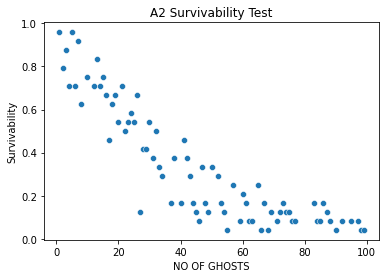

In [29]:
sns.scatterplot(x="NO OF GHOSTS", y="Survivability", data=FinalDf).set(title=Agent+" Survivability Test")
fig1 = plt.gcf()
plt.show()

In [30]:
fig1.savefig("C:/Users/Acer/OneDrive/Desktop/AGENTS/A2Survivability.png",dpi=100)

In [31]:
Timedf=df.groupby(["NO OF GHOSTS","RESULT"], as_index=False)['TIME'].mean()
Timedf=Timedf.query('RESULT != False')
Timedf

,NO OF GHOSTS,RESULT,TIME
1,1,True,15.048037
3,2,True,32.583097
5,3,True,14.801181
7,4,True,35.304443
9,5,True,28.772589
...,...,...,...
166,92,True,207.856032
170,95,True,190.772103
173,97,True,22.841675
175,98,True,387.936418


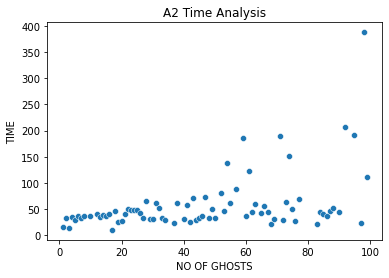

In [32]:
graphtime=sns.scatterplot(x="NO OF GHOSTS", y="TIME", data=Timedf).set(title=Agent+" Time Analysis")
fig2 = plt.gcf()
plt.show()

In [33]:
fig2.savefig("C:/Users/Acer/OneDrive/Desktop/AGENTS/A2TimeAnalysis.png",dpi=100)